In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import datetime
from datetime import timedelta
import ast
import json    
import missingno as msno
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display
from sklearn.impute import SimpleImputer
# from sklearn_pandas import CategoricalImputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression



In [2]:
df = pd.read_csv('../data/ML.csv')

## ready for Pipeline

delete low varince

In [3]:
nzv = VarianceThreshold(threshold=0.1)

dealing with Skewness

In [4]:
yj = PowerTransformer(method="yeo-johnson")
# X_norm = ColumnTransformer([("norm", yj, selector(dtype_include="number"))])

Standardization

In [5]:
scaler = StandardScaler()

# standardize all numeric features
# std = ColumnTransformer([("norm", scaler, selector(dtype_include="number"))])

OneHotEncoder for advertiser_type

In [6]:
encoder = OneHotEncoder(handle_unknown="ignore")


pca to try if it going to help 

In [7]:
df.shape[1]

32

In [8]:
# pca = PCA(n_components=5)


In [9]:
preprocessor = ColumnTransformer(
  remainder="passthrough",
  transformers=[
  ("nzv_encode", nzv, selector(dtype_include="number")),
  ("norm", yj, selector(dtype_include="number")),
  ("std_encode", scaler, selector(dtype_include="number")),
  # ("pca_encode", pca, selector(dtype_include="number")),
  ("one-hot", encoder, selector(dtype_include="object")),
  ])

In [10]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('nzv_encode', VarianceThreshold(threshold=0.1),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f82bc6a2080>),
                                ('norm', PowerTransformer(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f82bc6a0d00>),
                                ('std_encode', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f822fabe740>),
                                ('one-hot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f822fabe6e0>)])

In [11]:
# df.shape

here i dropped many columns DayOfRent will accully till the 

In [ ]:
X = df.drop(['isRent' , 'DayOfRent' , 'timeBeforeRent' , 'onMarket' , 'id'] , axis=1)
y = df['isRent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lr = LogisticRegression(max_iter=500)

# training & prediction


In [ ]:
model_pipeline = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("lr", lr),
])

In [ ]:
model_pipeline.fit(X_train , y_train)

/home/vscode/.local/lib/python3.10/site-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
/home/vscode/.local/lib/python3.10/site-packages/numpy/core/_methods.py:247: RuntimeWarning: overflow encountered in reduce
/home/vscode/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3211: RuntimeWarning: overflow encountered in power


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nzv_encode',
                                                  VarianceThreshold(threshold=0.1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63b4c71f0>),
                                                 ('norm', PowerTransformer(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63ff706d0>),
                                                 ('std_encode',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63b50f160>),
                                                 ('one-hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63b50d510>)])),
                ('lr', LogisticRegression(max_iter=500))])

In [ ]:
model_pipeline.score(X_test , y_test)

0.6163265306122448

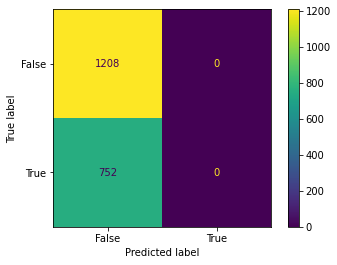

In [ ]:
cm = confusion_matrix(y_test , model_pipeline.predict(X_test))
disp = ConfusionMatrixDisplay(
  confusion_matrix=cm,
  display_labels=model_pipeline.classes_
  )
  
disp.plot()

In [ ]:
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# evaluation
print('Confusion Matrix :\n', confusion_matrix(model_pipeline, X_train))
print()
print('Classification Report :\n', classification_report(model_pipeline,X_train  ))

TypeError: Expected sequence or array-like, got <class 'sklearn.pipeline.Pipeline'>

In [ ]:
# Helper packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *

# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
from sklearn.inspection import partial_dependence

In [ ]:
# Center and scale (i.e., standardize) all numeric features

encoder = OneHotEncoder(handle_unknown="ignore")
X_train_std = encoder.fit_transform(X_train)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

# create KNN model object
knn = KNeighborsClassifier(n_neighbors=5)

# define loss function
loss = 'roc_auc'

# create 5 fold CV object
kfold = KFold(n_splits=5, random_state=123, shuffle=True)

# fit model with 5-fold CV
results = cross_val_score(knn, X_train_std, y_train, cv=kfold, scoring=loss)


np.round(results, 3)

array([0.708, 0.683, 0.693, 0.676, 0.687])

In [ ]:
knn = KNeighborsClassifier()

# Create grid of hyperparameter values
hyper_grid = {'n_neighbors': range(1, 300, 4)}

# Tune a knn model using grid search
grid_search = GridSearchCV(knn, hyper_grid, cv=kfold, scoring=loss)
results = grid_search.fit(X_train_std, y_train)

# Best model's cross validated RMSE
abs(results.best_score_)

0.6988308039054366

In [ ]:
optimal_k = results.best_estimator_.get_params().get('n_neighbors')
optimal_k

13

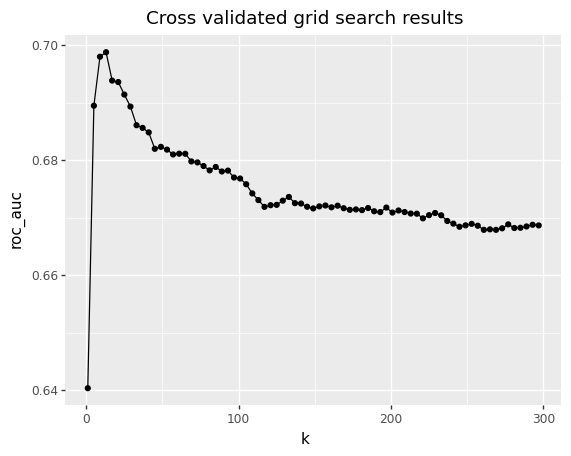

<ggplot: (8781885149797)>

In [ ]:
all_errors = pd.DataFrame({
  'k': range(1, 300, 4),
  'roc_auc': results.cv_results_['mean_test_score']
  })

(ggplot(all_errors, aes(x='k', y='roc_auc'))
 + geom_line()
 + geom_point()
 + ggtitle("Cross validated grid search results"))

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.


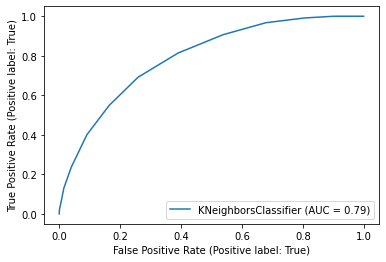

In [ ]:
knn_best = KNeighborsClassifier(n_neighbors=optimal_k)
knn_best_fit = knn_best.fit(X_train_std, y_train)

# create ROC curve
plot_roc_curve(knn_best_fit, X_train_std, y_train)  
plt.show()

In [ ]:
predictions = knn_best_fit.predict(X_train_std)
cm = confusion_matrix(y_train, predictions)
cm

array([[2589,  508],
       [ 812,  989]])

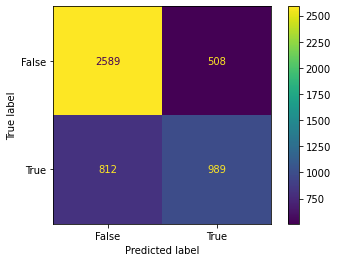

In [ ]:
disp = ConfusionMatrixDisplay(
  confusion_matrix=cm,
  display_labels=knn_best_fit.classes_
  )
  
disp.plot()

In [ ]:
print(classification_report(y_train, predictions, target_names=["neg", "pos"]))

              precision    recall  f1-score   support

         neg       0.76      0.84      0.80      3097
         pos       0.66      0.55      0.60      1801

    accuracy                           0.73      4898
   macro avg       0.71      0.69      0.70      4898
weighted avg       0.72      0.73      0.72      4898



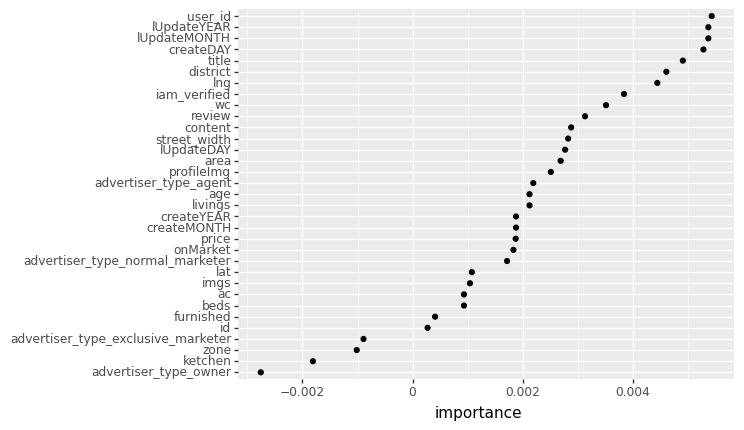

<ggplot: (8781885224507)>

In [ ]:
r = permutation_importance(
  knn_best_fit, 
  X_train_std, 
  y_train,
  n_repeats=30,
  random_state=0
  )
  
vip = pd.DataFrame({'feature': X_train.columns.values,
                    'importance': r.importances_mean})
                    
(ggplot(vip, aes('importance', 'reorder(feature, importance)'))
  + geom_point()
  + labs(y=None))

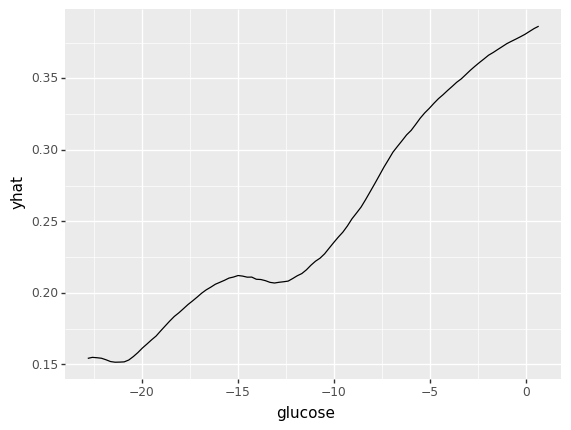

<ggplot: (8781885695610)>

In [ ]:
pd_results = partial_dependence(
  knn_best_fit, X_train_std, features=1, kind='average',
  percentiles=(0, 1)
) 
  
pd_output = pd.DataFrame({'glucose': pd_results['values'][0],
                          'yhat': pd_results['average'][0]})
                          
(ggplot(pd_output, aes('glucose', 'yhat'))
  + geom_line())

In [ ]:
# Helper packages
import numpy as np
import pandas as pd
from plotnine import *
from scipy.stats import uniform
from scipy.stats import randint

# Modeling packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from category_encoders.ordinal import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import partial_dependence
from sklearn.pipeline import Pipeline

In [ ]:
rf_mod = RandomForestClassifier()

# create modeling pipeline
model_pipeline = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("rf_mod", rf_mod),
])

In [ ]:
X = df.drop(['isRent' , 'DayOfRent' , 'timeBeforeRent'] , axis=1)
y = df['isRent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=123)

In [ ]:
model_pipeline.fit(X_train , y_train)

/home/vscode/.local/lib/python3.10/site-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
/home/vscode/.local/lib/python3.10/site-packages/numpy/core/_methods.py:247: RuntimeWarning: overflow encountered in reduce
/home/vscode/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3211: RuntimeWarning: overflow encountered in power


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nzv_encode',
                                                  VarianceThreshold(threshold=0.1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63b4c71f0>),
                                                 ('norm', PowerTransformer(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63ff706d0>),
                                                 ('std_encode',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63b50f160>),
                                                 ('one-hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63b50d510>)])),
                ('lr', LogisticRegression(max_iter=500))])

In [ ]:
model_pipeline.score(X_test , y_test)

0.6163265306122448

In [ ]:
cm = confusion_matrix(y_test , model_pipeline.predict(X_test))

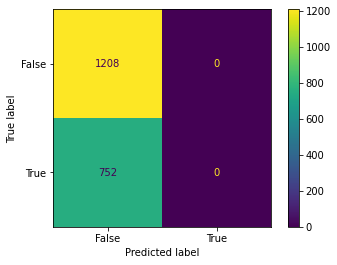

In [ ]:
cm = confusion_matrix(y_test , model_pipeline.predict(X_test))
disp = ConfusionMatrixDisplay(
  confusion_matrix=cm,
  display_labels=model_pipeline.classes_
  )
  
disp.plot()

In [ ]:
print(classification_report(y_test,  model_pipeline.predict(X_test), target_names=["neg", "pos"]))

              precision    recall  f1-score   support

         neg       0.62      1.00      0.76      1208
         pos       0.00      0.00      0.00       752

    accuracy                           0.62      1960
   macro avg       0.31      0.50      0.38      1960
weighted avg       0.38      0.62      0.47      1960



/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


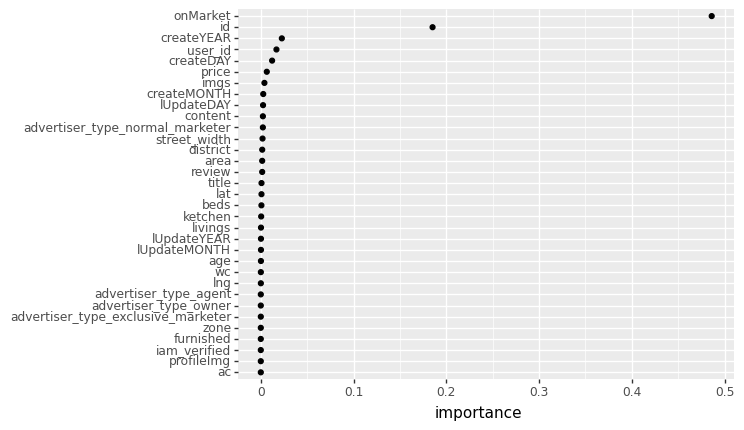

<ggplot: (8789178195395)>

In [ ]:
r = permutation_importance(
  model_pipeline, 
  X_train, 
  y_train,
  n_repeats=30,
  random_state=0
  )
  
vip = pd.DataFrame({'feature': X_train.columns.values,
                    'importance': r.importances_mean})
                    
(ggplot(vip, aes('importance', 'reorder(feature, importance)'))
  + geom_point()
  + labs(y=None))

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
rf_mod = DecisionTreeClassifier()

In [ ]:
model_pipeline = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("rf_mod", rf_mod),
])

In [ ]:
model_pipeline.fit(X_train , y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3211: RuntimeWarning: overflow encountered in power
/home/vscode/.local/lib/python3.10/site-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nzv_encode',
                                                  VarianceThreshold(threshold=0.1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63b4c71f0>),
                                                 ('norm', PowerTransformer(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63ff706d0>),
                                                 ('std_encode',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63b50f160>),
                                                 ('one-hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63b50d510>)])),
                ('rf_mod', RandomForestClassifier())])

In [ ]:
model_pipeline.score(X_test , y_test)

0.7501530924678506

In [ ]:
cm = confusion_matrix(y_test , model_pipeline.predict(X_test))

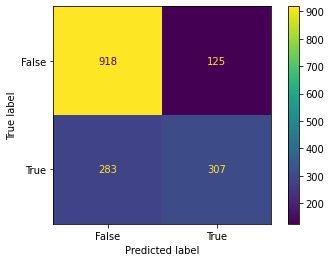

In [ ]:
cm = confusion_matrix(y_test , model_pipeline.predict(X_test))
disp = ConfusionMatrixDisplay(
  confusion_matrix=cm,
  display_labels=model_pipeline.classes_
  )
  
disp.plot()

In [ ]:
print(classification_report(y_test,  model_pipeline.predict(X_test), target_names=["neg", "pos"]))

              precision    recall  f1-score   support

         neg       0.76      0.88      0.82      1043
         pos       0.71      0.52      0.60       590

    accuracy                           0.75      1633
   macro avg       0.74      0.70      0.71      1633
weighted avg       0.74      0.75      0.74      1633



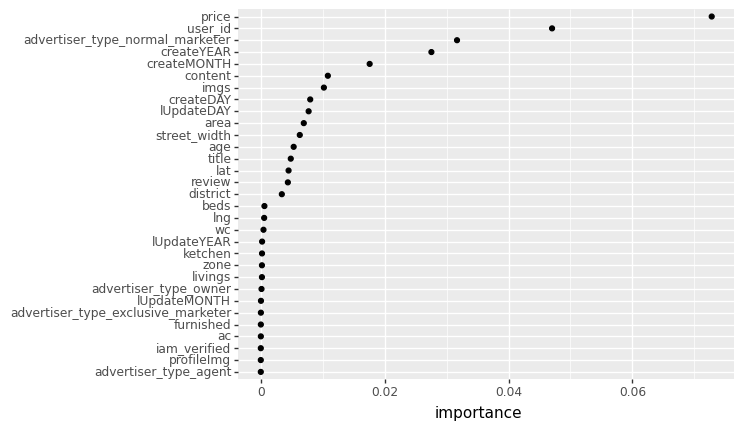

<ggplot: (8789180505854)>

In [ ]:
r = permutation_importance(
  model_pipeline, 
  X_train, 
  y_train,
  n_repeats=30,
  random_state=0
  )
  
vip = pd.DataFrame({'feature': X_train.columns.values,
                    'importance': r.importances_mean})
                    
(ggplot(vip, aes('importance', 'reorder(feature, importance)'))
  + geom_point()
  + labs(y=None))

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [ ]:
model_pipeline = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("clf_gini", clf_gini),
])

In [ ]:
model_pipeline.fit(X_train , y_train)

/home/vscode/.local/lib/python3.10/site-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
/home/vscode/.local/lib/python3.10/site-packages/numpy/core/_methods.py:247: RuntimeWarning: overflow encountered in reduce
/home/vscode/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3211: RuntimeWarning: overflow encountered in power


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nzv_encode',
                                                  VarianceThreshold(threshold=0.1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63b4c71f0>),
                                                 ('norm', PowerTransformer(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63ff706d0>),
                                                 ('std_encode',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63b50f160>),
                                                 ('one-hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63b50d510>)])),
                ('clf_gini',
                 DecisionTreeClassifier(max_depth=3, random_state=0))])

In [ ]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7592


In [ ]:
y_pred_train_gini = model_pipeline.predict(X_train)

y_pred_train_gini

array([False, False, False, ..., False, False, False])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7786


In [ ]:
print('Training set score: {:.4f}'.format(model_pipeline.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model_pipeline.score(X_test, y_test)))

Training set score: 0.7786
Test set score: 0.7592
